**Problem Definition**

Predict the taxi ride duration of the trips in seconds at New York City

**Hypothesis Generation**

weekdays tends to have more trip duration due to high congestion

In [5]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from geopy.distance import great_circle
%matplotlib inline

In [69]:
#Read dataset into the dataframe
data = pd.read_csv('/content/nyc_taxi_trip_duration.csv')

In [71]:
#Display the first 5 rows
data.head()

#Below the first 5 rows of the dataframe is being displayed.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1.0,-73.953918,40.778873,-73.963875,40.771164,N,400.0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2.0,-73.988312,40.731743,-73.994751,40.694931,N,1100.0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2.0,-73.997314,40.721458,-73.948029,40.774918,N,1635.0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6.0,-73.961670,40.759720,-73.956779,40.780628,N,1141.0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1.0,-74.017120,40.708469,-73.988182,40.740631,N,848.0


** Checking rows,columns,summary statistics and also handling the missing values**

In [72]:
#Check number of rows and column

#Determing number of rows and column
num_rows = data.shape[0]
num_columns = data.shape[1]

#Print the number of rows and columns
print(f"Number of rows: {num_rows }")
print (f"Number of columns: {num_columns}")

Number of rows: 704935
Number of columns: 11


In [73]:
#Getting the columns names
data.columns

#It shows the name of each column on the dataframe

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [74]:
#Checking the basic statiastics of the variables in the dataset using the describe() function
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,704935.000000,704934.000000,704934.000000,704934.000000,704934.000000,704934.000000,7.049340e+05
mean,1.535353,1.662090,-73.973508,40.750925,-73.973418,40.751781,9.510188e+02
std,0.498749,1.312557,0.070594,0.033760,0.070477,0.036163,3.874172e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737354,-73.991310,40.735947,3.970000e+02
50%,2.000000,1.000000,-73.981750,40.754074,-73.979752,40.754520,6.630000e+02
75%,2.000000,2.000000,-73.967354,40.768326,-73.963028,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [75]:
#Verifying the missing values as got from the describe

data.isnull().sum()
#They are 7 missing values in our dataset

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       1
pickup_longitude      1
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

In [80]:
#Handling missing values by imputation
data['pickup_latitude'].fillna(data['pickup_latitude'].mean(),inplace=True)
data['dropoff_longitude'].fillna(data['dropoff_longitude'].mean(),inplace=True)
data['dropoff_latitude'].fillna(data['dropoff_latitude'].mean(),inplace=True)
data['trip_duration'].fillna(data['trip_duration'].mean(),inplace=True)
data['passenger_count'].fillna(data['passenger_count'].mean(),inplace=True)
data['pickup_longitude'].fillna(data['pickup_longitude'].mean(),inplace=True)
data['store_and_fwd_flag'].fillna(data['store_and_fwd_flag'].mode()[0], inplace=True)

In [81]:
#Checking the missing values
data.isnull().sum().sum()

#All the missing values are being handled and we now have zero missing value.

0

**Dealing the the data types**

In [14]:
#Checking the  data types of each columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count       float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object

In [15]:
#Retrieve columns that constist of integers.
data.dtypes[data.dtypes == 'int64']

#Below it shows the columns that contain integer64 data type.

vendor_id    int64
dtype: object

In [16]:
#Retrieve columns that consist of float.
data.dtypes[data.dtypes == 'float64']

#Below it shows the columns that contain float64 data type.

passenger_count      float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
dtype: object

In [17]:
#Retrieve object data type only
data.dtypes[data.dtypes == 'object']

#Below it shows the columns that contain object data type.

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [18]:
#Change the dropoff _datetime and pickup_datetime data format
data['pickup_datetime'] = data['pickup_datetime'].astype('datetime64')
data['dropoff_datetime'] = data['dropoff_datetime'].astype('datetime64')


#Change the store_and_fwd_flag data type, we convert it from object to category
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [19]:
# Checking the data type if its converted
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count              float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                float64
dtype: object

**Present trip per day, per hour, per time of the day, per month**

In [20]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [21]:
#Extract day of the week (Monady to Sunday)
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

#Extract hour
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

#Extract time of a day
data['pickup_time'] = data['pickup_datetime'].dt.time
data['dropoff_time'] = data['dropoff_datetime'].dt.time

#Extract Month
data['pickup_month'] = data['pickup_datetime'].dt.month_name()
data['dropoff_month'] = data['dropoff_datetime'].dt.month_name()


#Create function Duration() of the day
def Duration(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Everning'
  else:
    return 'Late Night'
#Extracting time of the day
data['pickup_timeofday'] = data['pickup_hour'].apply(Duration)
data['dropoff_timeofday'] = data['dropoff_hour'].apply(Duration)

In [22]:
#Display Present trip per day, per hour, per time of the day, per month
data[['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_hour','dropoff_hour','pickup_time','dropoff_time','pickup_month','dropoff_month','pickup_timeofday','dropoff_timeofday']]

,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_time,dropoff_time,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday,16,16,16:40:21,16:47:01,February,February,Everning,Everning
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday,23,23,23:35:37,23:53:57,March,March,Late Night,Late Night
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday,17,18,17:59:33,18:26:48,February,February,Everning,Everning
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday,9,10,09:44:31,10:03:32,January,January,Morning,Morning
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday,6,6,06:42:23,06:56:31,February,February,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
704930,2016-06-18 20:31:59,2016-06-18 20:37:55,Saturday,Saturday,20,20,20:31:59,20:37:55,June,June,Everning,Everning
704931,2016-02-08 02:31:10,2016-02-08 02:37:01,Monday,Monday,2,2,02:31:10,02:37:01,February,February,Late Night,Late Night
704932,2016-04-18 23:05:20,2016-04-18 23:12:41,Monday,Monday,23,23,23:05:20,23:12:41,April,April,Late Night,Late Night
704933,2016-02-18 12:55:53,2016-02-18 12:59:07,Thursday,Thursday,12,12,12:55:53,12:59:07,February,February,Afternoon,Afternoon


In [23]:
#Calulating new future distance and converting ot to kilometers.
def distance_Trip(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
  start_coordinates = (pickup_latitude,pickup_longitude)
  stop_coordinates = (dropoff_latitude,dropoff_longitude)
  try:
     return great_circle(start_coordinates,stop_coordinates).km
  except ValueError:
    return np.nan

In [24]:
#Adding a new column with distance in the dataset for each trip
data['distance'] = data.apply(lambda x: distance_Trip(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis = 1)


In [25]:
#Display the first few column
data.head(3)

#It display the first 3 rows, so that we can see if new column "distance" is added to the dataset.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_hour,dropoff_hour,pickup_time,dropoff_time,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1.0,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,16,16,16:40:21,16:47:01,February,February,Everning,Everning,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2.0,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,23,23,23:35:37,23:53:57,March,March,Late Night,Late Night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2.0,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,17,18,17:59:33,18:26:48,February,February,Everning,Everning,7.250763


**Univariate Analysis and its Plot**

In [26]:
import matplotlib.figure

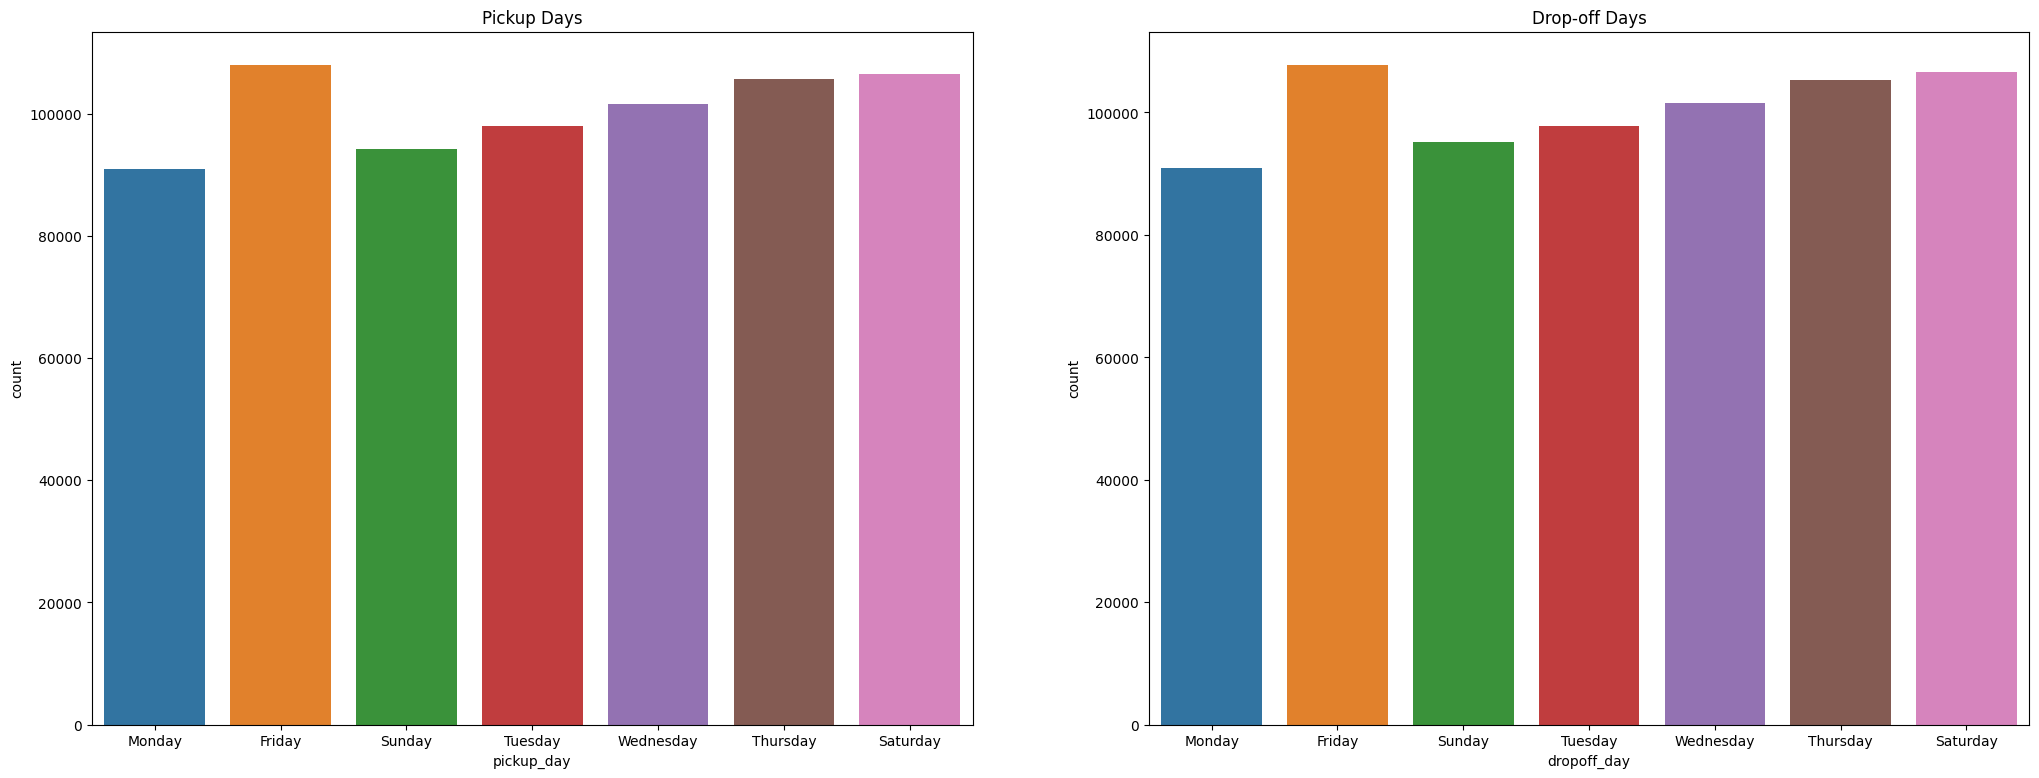

In [27]:
#Analysing pickup and drop-off
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(25,9))
ax1.set_title('Pickup Days')
ax = sns.countplot(x = "pickup_day",data = data, ax = ax1)
ax2.set_title('Drop-off Days')
ax = sns.countplot(x = "dropoff_day",data = data, ax = ax2)

#From the gragh we abserve that Friday is the busiest day of the week and also that Monday is the least busiest day of the week.

In [28]:
#Checking which trip are recorded
data['store_and_fwd_flag'].value_counts(normalize = True)

#We found that 99% of the time trip are not recorded in the server and only 0.04% of the trip is recorded.

N    0.994487
Y    0.005513
Name: store_and_fwd_flag, dtype: float64

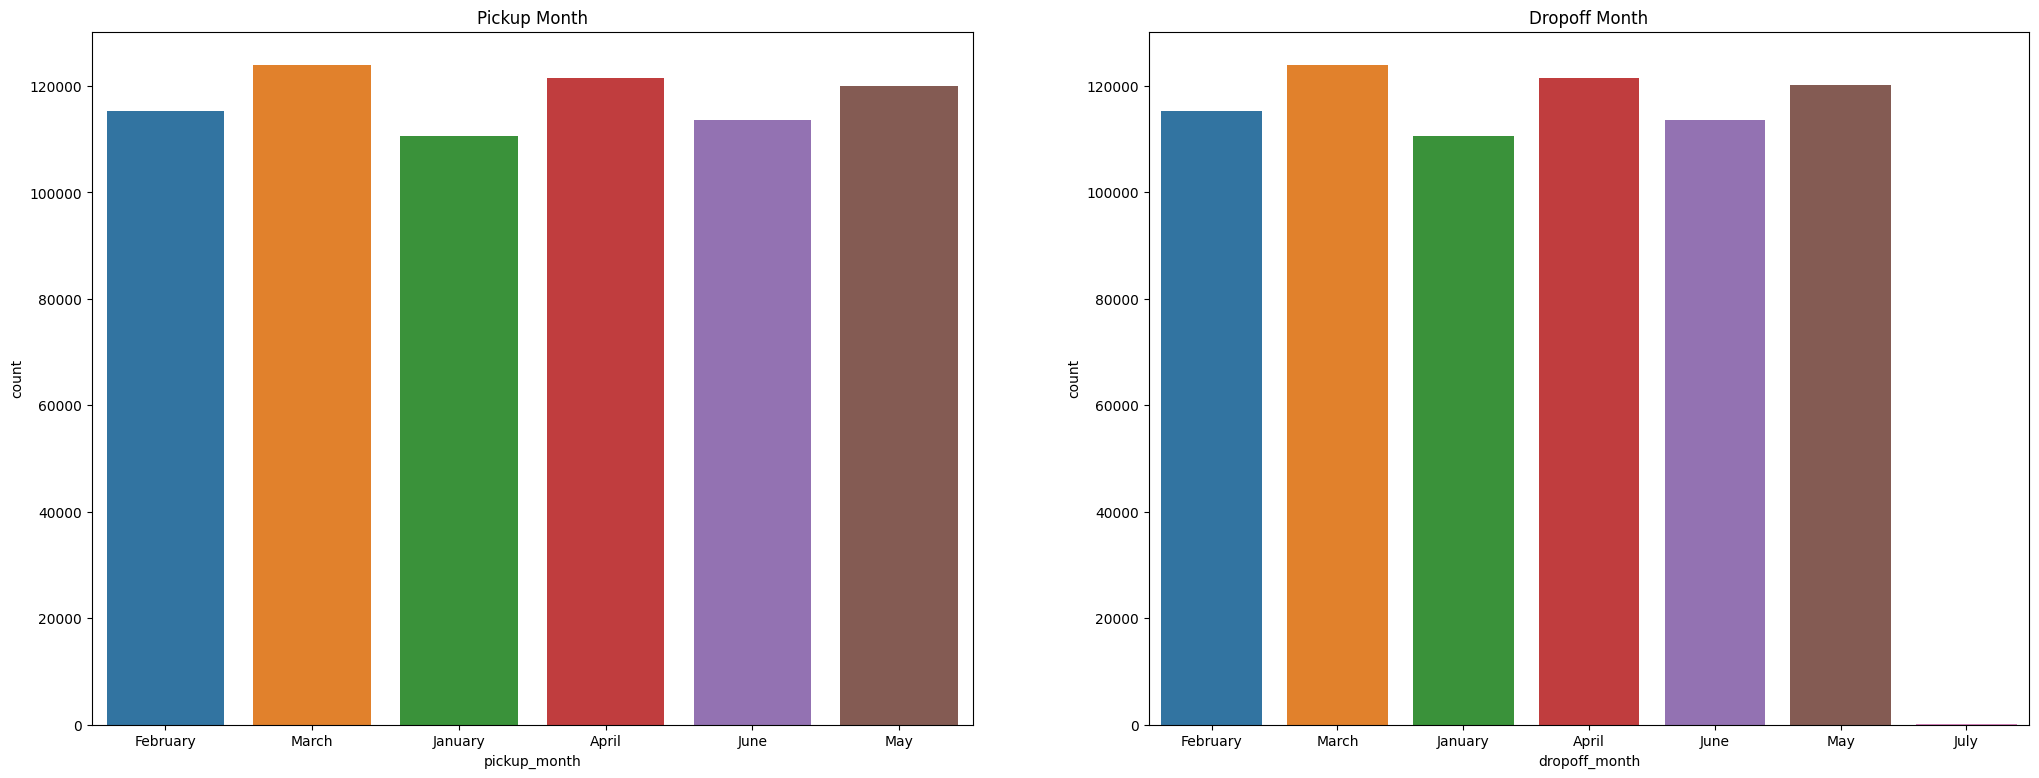

In [29]:
#Checking which month has the highest trips
figure,(ax3,ax4)=plt.subplots(ncols = 2,figsize =(25,9) )

ax3.set_title('Pickup Month')
ax = sns.countplot(x = "pickup_month",data = data, ax = ax3)
ax4.set_title('Dropoff Month')
ax = sns.countplot(x = "dropoff_month",data = data, ax = ax4)

#We observe that March is the busiest month followed by April and also observed that January is the least busiest month followed by June for the drivers.

<ipython-input-30-b49b67c6001b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['passenger_count'])


Text(0.5, 1.0, 'Passenger Count Distributions')

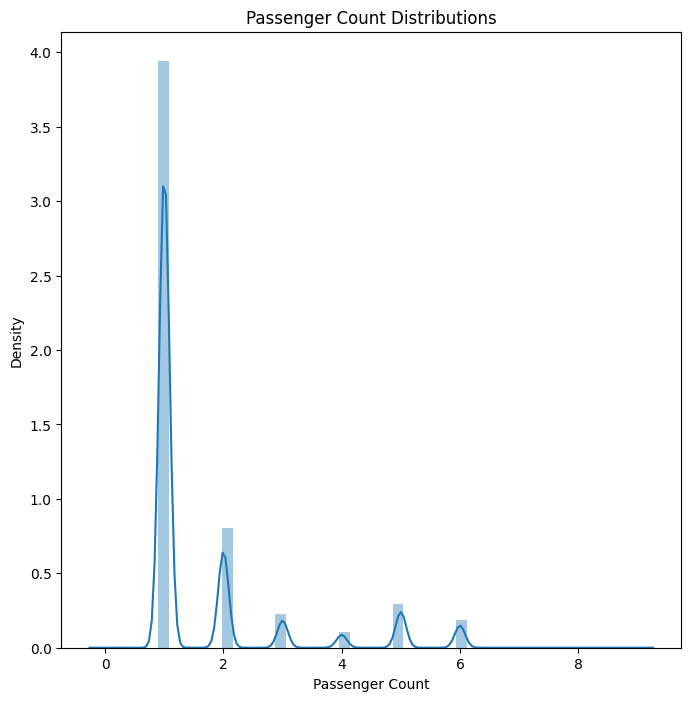

In [30]:
#Visualizing passenger counts distribution
plt.figure(figsize=(8,8))
sns.distplot(data['passenger_count'])
plt.xlabel("Passenger Count")
plt.ylabel("Density")
plt.title("Passenger Count Distributions")

#Passanger 1 has the highest density followed by passender 2 and passenger 4 has the lowest density.

In [31]:
#Data Descriptive
data['passenger_count'].value_counts()

#We observe that:
#Most of the passenger's density lies between 1 and 2
#There is two trips with max passenger of 7 and 9
#We also have 33 trips with zero passenger that means the bookings might be cancelled or they were no bookings


1.0    500088
2.0    101658
5.0     37622
3.0     28634
6.0     23320
4.0     13578
0.0        32
7.0         1
9.0         1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Trip Duration')

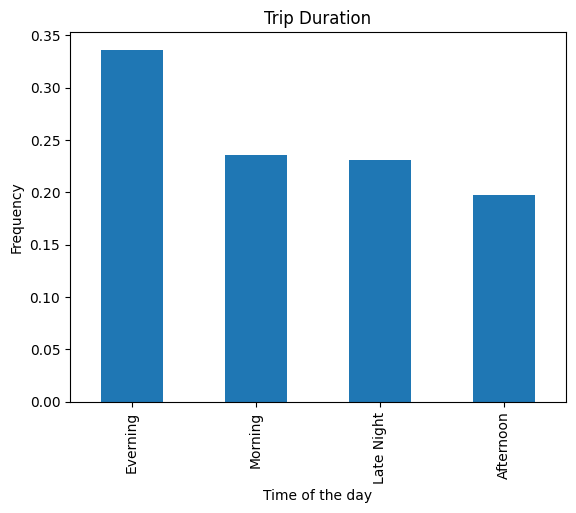

In [32]:
#Analyze trip duration using a bar plot
data['dropoff_timeofday'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("Time of the day")
plt.ylabel("Frequency")
plt.title("Trip Duration")

#Evening time is the busiest time followed by morning which seems to make sense because most people go to work in the morning and in the evening they returning home.

Text(0.5, 1.0, 'Trip Duration')

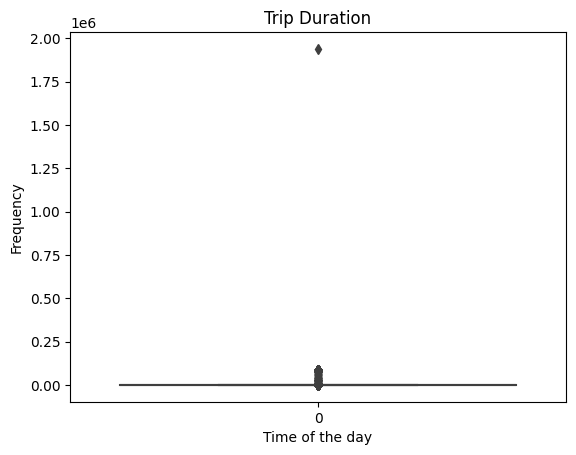

In [33]:
#Analyze trip duration using a boxplot
sns.boxplot(data['trip_duration'],orient= 'vertical')
plt.xlabel("Time of the day")
plt.ylabel("Frequency")
plt.title("Trip Duration")

In [34]:
#Sort values
data['trip_duration'].sort_values(ascending = False )

#There is an outlier and the value of the outliner is  1939736 is the extreme value in a dataset.

21813     1939736.0
259437      86391.0
119185      86387.0
177225      86378.0
496391      86377.0
            ...    
398887          1.0
102646          1.0
70318           1.0
512833          1.0
95823           1.0
Name: trip_duration, Length: 704935, dtype: float64

In [35]:
# Calculating average Speeed
data['average_speed'] = data['distance']/(data['trip_duration']/3600)

data['average_speed'].head()

#From Average Speed we can say that NYC City have major Traffic

0    10.791669
1    13.513473
2    15.964983
3     7.449573
4    18.375877
Name: average_speed, dtype: float64

**Bivariate Analysis**

Text(0.5, 1.0, 'Trip Duration Per Vendor')

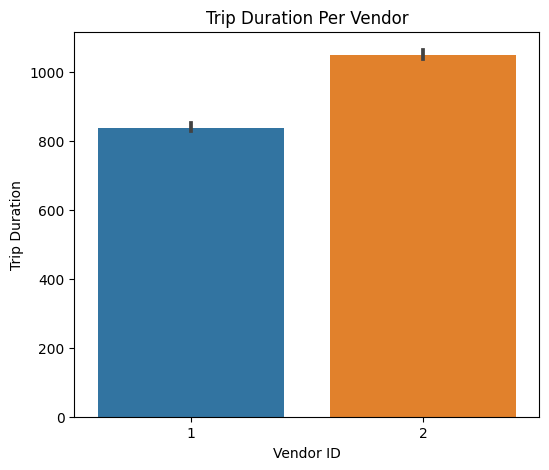

In [36]:
#Analyse trip duration and Vendor ID using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y = 'trip_duration', x = 'vendor_id',data = data)
plt.ylabel( "Trip Duration")
plt.xlabel("Vendor ID")
plt.title("Trip Duration Per Vendor")


#Vendor 1 offer short trips only and  vendor 2 offer both short and long trips as that's why people prefer vendor 2 most.

Text(0.5, 1.0, 'Trip Duration Per Vendor')

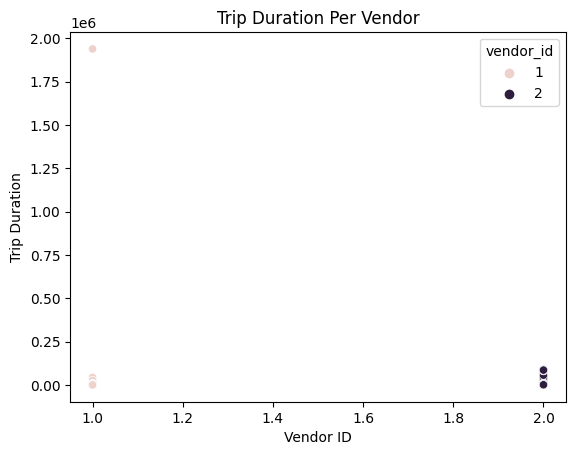

In [37]:
#Analyze trip duration and Vendor ID using scatterplot
sns.scatterplot(data=data,x='vendor_id',y='trip_duration',hue='vendor_id')
plt.ylabel( "Trip Duration")
plt.xlabel("Vendor ID")
plt.title("Trip Duration Per Vendor")

#Vendor 1 offer short trips only and  vendor 2 offer both short and long trips as thats why people prefer vendor 2 most

Text(0.5, 1.0, 'Trip Duration Per Store and Forward Flag')

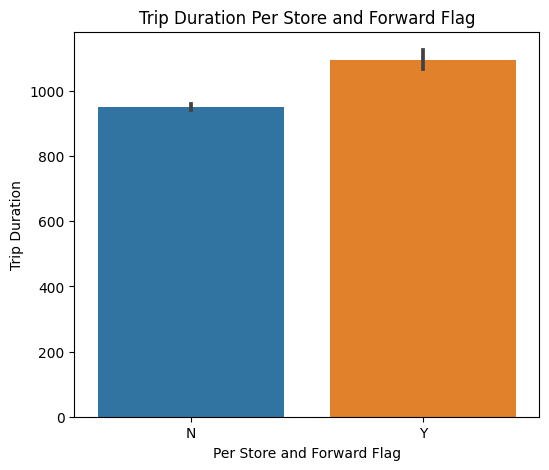

In [38]:
#Analyze trip duration and per store and forward flag using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y='trip_duration',x='store_and_fwd_flag',data = data)
plt.ylabel( "Trip Duration")
plt.xlabel("Per Store and Forward Flag")
plt.title("Trip Duration Per Store and Forward Flag")

#we can observe that only short trip are recorded but  longer trip ware not recorded.

Text(0.5, 1.0, 'Trip Duration per store and  forward flag')

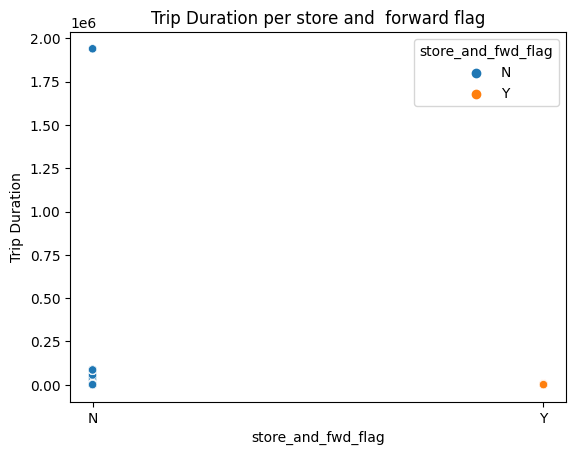

In [39]:
#Scatter plot of trip duration per store and forward flag
sns.scatterplot(data=data,x='store_and_fwd_flag',y='trip_duration',hue='store_and_fwd_flag')
plt.ylabel( "Trip Duration")
plt.xlabel("store_and_fwd_flag")
plt.title("Trip Duration per store and  forward flag")

#Only short trip is recorded, for longer trip is not recorded.


Text(0.5, 1.0, 'Trip Duration Per Passenger Count')

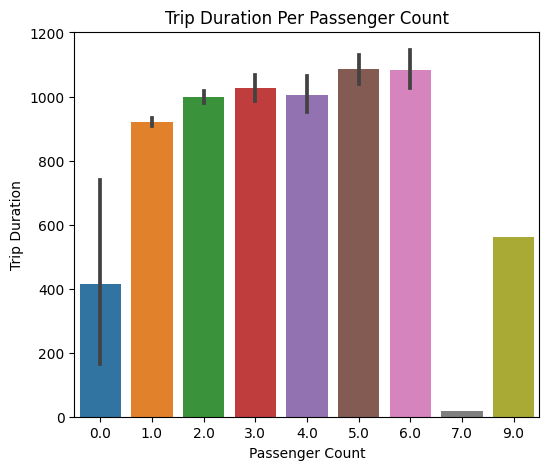

In [40]:
#Analyze trip duration and passenger count using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y='trip_duration',x='passenger_count',data = data)
plt.ylabel( "Trip Duration")
plt.xlabel("Passenger Count")
plt.title("Trip Duration Per Passenger Count")


#Most of the Passenger Trip Duration is between 800 to 1000 sec.
#The lowest trip duration is around 800 people might have cancelled after booking.


Text(0.5, 1.0, 'Trip Duration per passenger count')

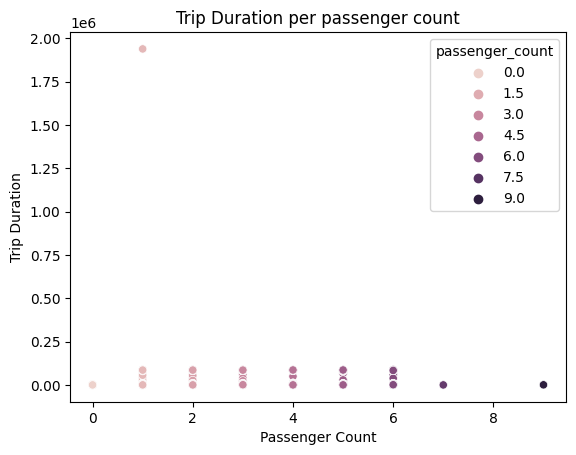

In [41]:
#Analyze trip duration and passenger count using a scatter plot
sns.scatterplot(data=data,x='passenger_count',y='trip_duration',hue='passenger_count')
plt.ylabel( "Trip Duration")
plt.xlabel("Passenger Count")
plt.title("Trip Duration per passenger count")

#There is an outliner on passenger one

Text(0.5, 1.0, 'Trip Duration per pickup time of day')

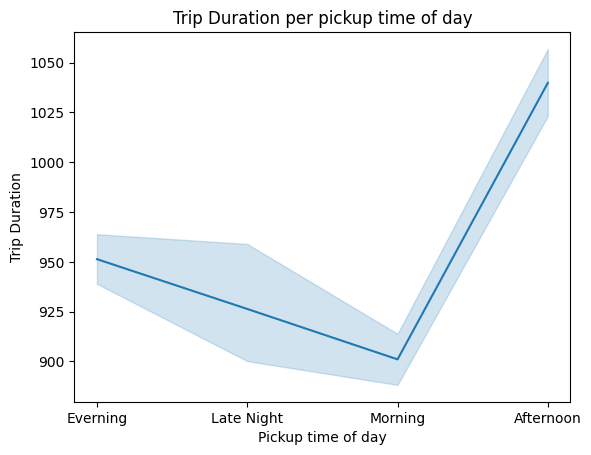

In [42]:
#Analyze trip duration per time of a day using a line plot
sns.lineplot(x='pickup_timeofday',y='trip_duration',data =data)
plt.ylabel( "Trip Duration")
plt.xlabel("Pickup time of day")
plt.title("Trip Duration per pickup time of day")

#In the afternoon they are more trips and in the morning we have less trips.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Saturday')])

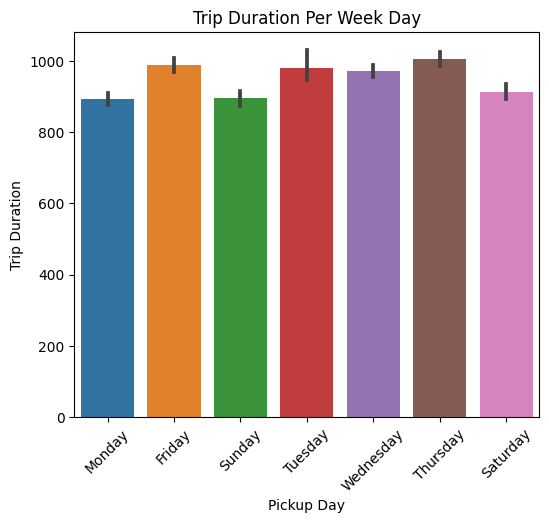

In [43]:
#Analyze trip duration per week using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y='trip_duration',x='pickup_day',data = data)
plt.ylabel( "Trip Duration")
plt.xlabel("Pickup Day")
plt.title("Trip Duration Per Week Day")
plt.xticks(rotation=45)

#Wednesday is the busiest day of the week followed by Thursday and Saturday and Monday are the least busiest day ofthe week.

Text(0.5, 1.0, 'Trip Duration per pickup  day of the week')

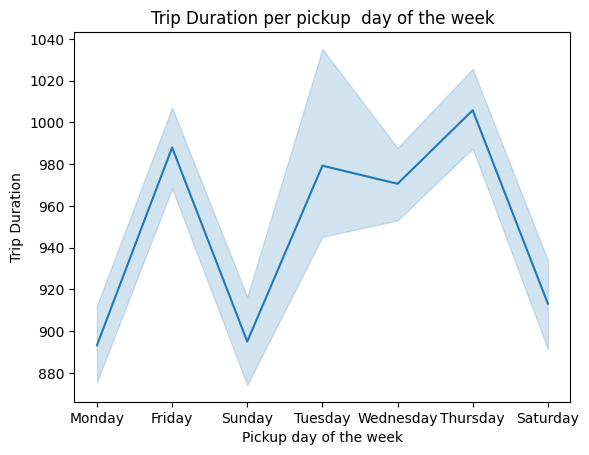

In [44]:
#Analze trip duration per week day using a line plot
sns.lineplot(x='pickup_day',y='trip_duration',data =data)
plt.ylabel( "Trip Duration")
plt.xlabel("Pickup day of the week")
plt.title("Trip Duration per pickup  day of the week")

#Wednesday is the busiest day of the week followed by Thursday and Saturday and Monday are the least busiest day ofthe week.

Text(0.5, 1.0, 'Trip Duration Per Month')

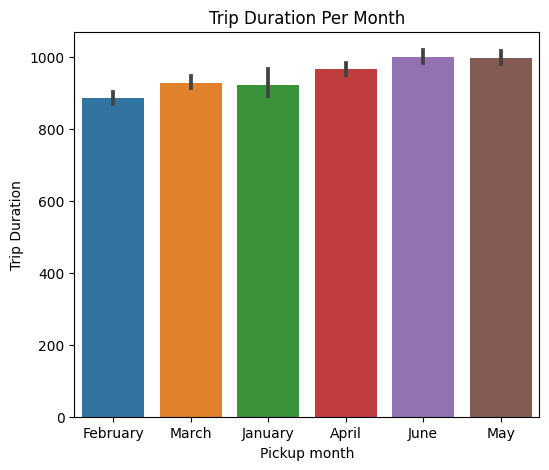

In [45]:
#Analyze trip duration per month using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y='trip_duration',x='pickup_month',data = data)
plt.ylabel( "Trip Duration")
plt.xlabel("Pickup month")
plt.title("Trip Duration Per Month")

#June is the busiest month  followed by may and the least buiest month is february

Text(0.5, 1.0, 'Trip Duration Per Month')

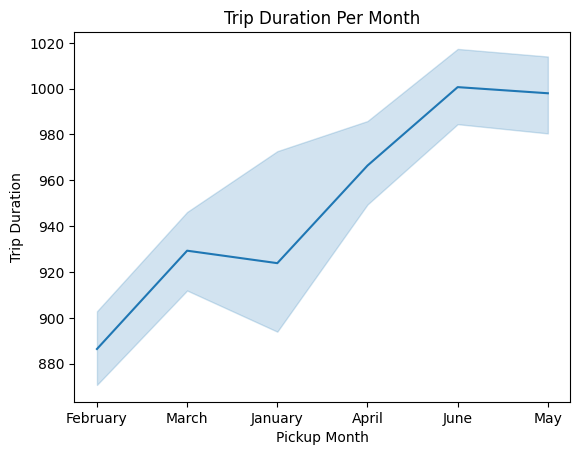

In [46]:
#Analze trip duration per month using a line graph
sns.lineplot(x='pickup_month',y='trip_duration',data =data)
plt.ylabel( "Trip Duration")
plt.xlabel("Pickup Month")
plt.title("Trip Duration Per Month")

#June is the busiest month  followed by March and the least buiest month is January

Text(0.5, 1.0, 'Distance Per Vendor')

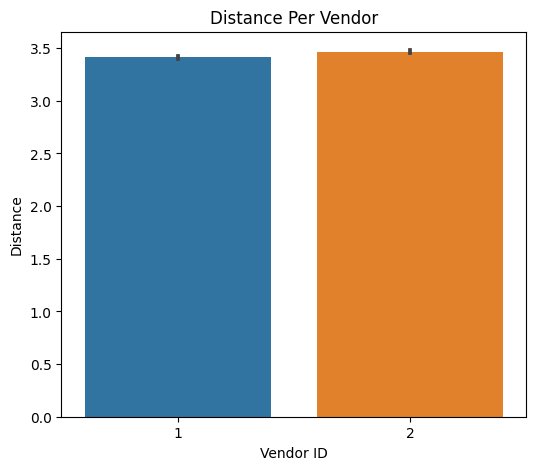

In [47]:
#Analyze distance and vendor using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y='distance',x='vendor_id',data = data)
plt.ylabel( "Distance")
plt.xlabel("Vendor ID")
plt.title("Distance Per Vendor")

#Vendor 2 has the most distance compare to vendor 1

Text(0.5, 1.0, 'Distance Per Vendor')

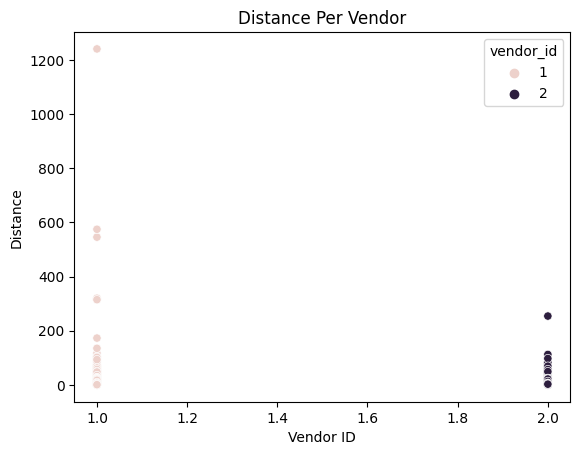

In [48]:
#Analyze distance per vendor using the scatterplot
sns.scatterplot(data=data,x='vendor_id',y='distance',hue='vendor_id')
plt.ylabel( "Distance")
plt.xlabel("Vendor ID")
plt.title("Distance Per Vendor")

#Vendor 2 coveredd most distance compare to vendor 1.

Text(0.5, 1.0, 'Distance Per Store and Forward Flag')

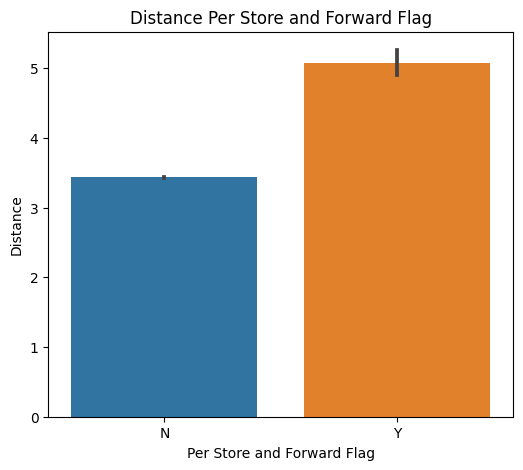

In [49]:
#Analyse distance per store and forward flag
plt.figure(figsize=(6,5))
sns.barplot(y='distance',x='store_and_fwd_flag',data = data)
plt.ylabel( "Distance")
plt.xlabel("Per Store and Forward Flag")
plt.title("Distance Per Store and Forward Flag")

#Distance was recorded fr longer trips

Text(0.5, 1.0, 'Distance Per Passenger Count')

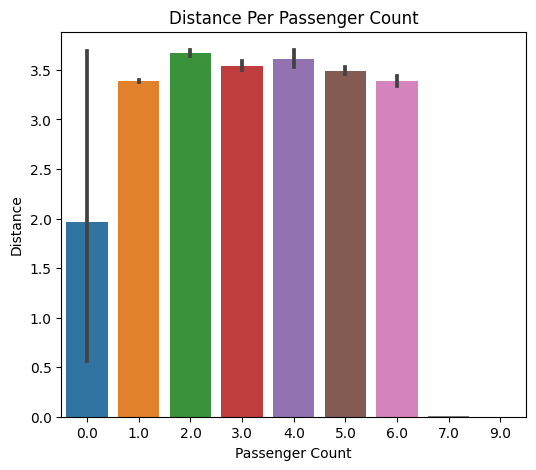

In [50]:
#Analyse distance per store and forward flag
plt.figure(figsize=(6,5))
sns.barplot(y='distance',x='passenger_count',data = data)
plt.ylabel( "Distance")
plt.xlabel("Passenger Count")
plt.title("Distance Per Passenger Count")

#Passenger count 3 has the most ditance followed by Passenger count 2 and Passenger Count 4 has the least distance.

Text(0.5, 1.0, 'Distance per passenger count')

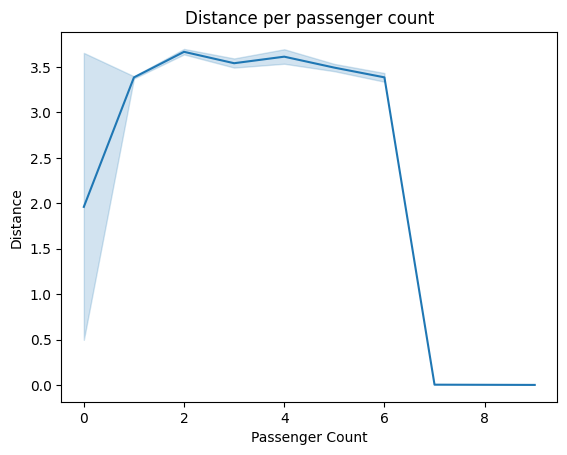

In [51]:
#Analyze distance per passenger count using a line plot
sns.lineplot(x='passenger_count',y='distance',data =data)
plt.ylabel( "Distance")
plt.xlabel("Passenger Count")
plt.title("Distance per passenger count")

#Passenger count 3 has the most ditance followed by Passenger count 2 and Passenger Count 4 has the least distance.

Text(0.5, 1.0, 'Distance per hour of the day')

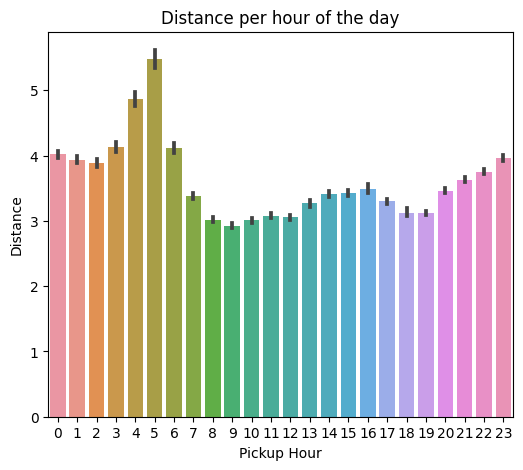

In [52]:
#Analye using a line plot distance per hour of the day
plt.figure(figsize=(6,5))
sns.barplot(y='distance',x='pickup_hour',data = data)
plt.ylabel( "Distance")
plt.xlabel("Pickup Hour")
plt.title("Distance per hour of the day")

#Pickup hour 5 has the most distance followed by both 4 and 6, pickup hour 10 has the least distance

Text(0.5, 1.0, 'Distance per hour of the day')

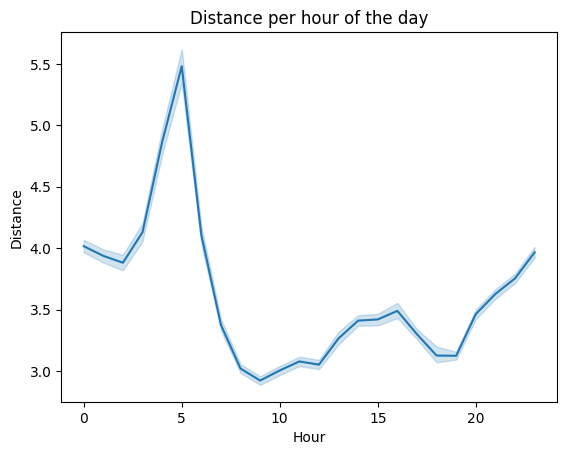

In [53]:
#Analyze distance per hour of the day
sns.lineplot(x='pickup_hour',y='distance',data =data)
plt.ylabel( "Distance")
plt.xlabel("Hour")
plt.title("Distance per hour of the day")

Text(0.5, 1.0, 'Distance per time of the day')

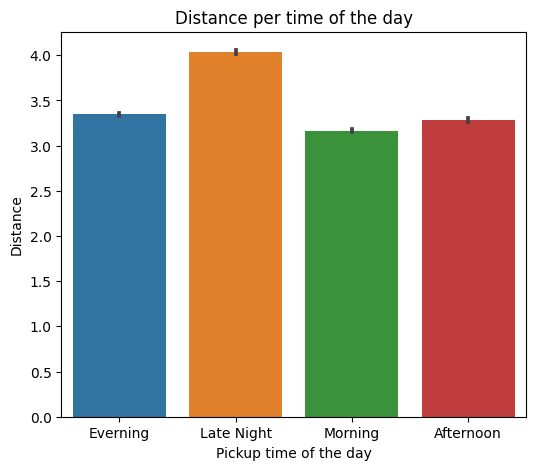

In [54]:
#Analyse the distance per time of the day using a barplot
plt.figure(figsize=(6,5))
sns.barplot(y='distance',x='pickup_timeofday',data = data)
plt.ylabel( "Distance")
plt.xlabel("Pickup time of the day")
plt.title("Distance per time of the day")


#Pickup hour 5 has the most distance followed by both 4 and 6, pickup hour 10 has the least distance.

Text(0.5, 1.0, 'Distance per pickup time of day')

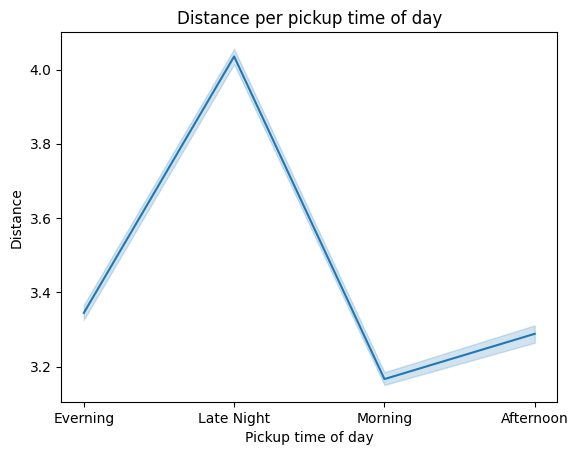

In [55]:
#Analyze distance per time of a day
sns.lineplot(x='pickup_timeofday',y='distance',data =data)
plt.ylabel( "Distance")
plt.xlabel("Pickup time of day")
plt.title("Distance per pickup time of day")


#Late nignt has more trips hence it cover most distance

Text(0.5, 1.0, 'Distance Per Month')

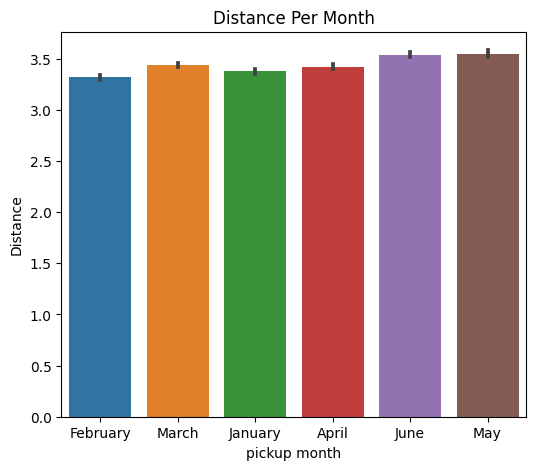

In [56]:
#Analyse distance per month
plt.figure(figsize=(6,5))
sns.barplot(y='distance',x='pickup_month',data = data)
plt.ylabel( "Distance")
plt.xlabel("pickup month")
plt.title("Distance Per Month")

#May has most trips hence it have the hihest distance.

Text(0.5, 1.0, 'Distance Per Month')

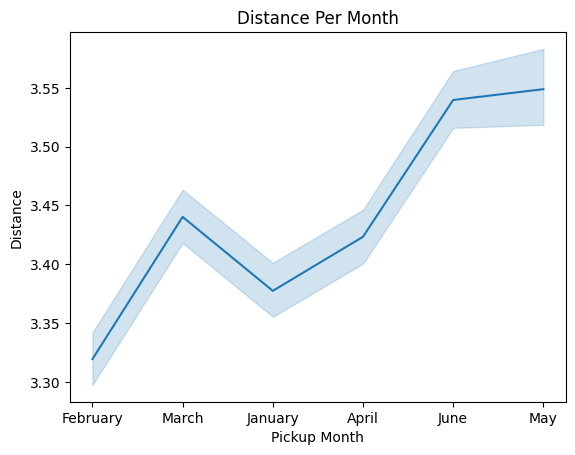

In [57]:
#Analze distance per month using a line graph
sns.lineplot(x='pickup_month',y='distance',data =data)
plt.ylabel( "Distance")
plt.xlabel("Pickup Month")
plt.title("Distance Per Month")

Text(0.5, 1.0, 'Passenger Count and Vendor ID')

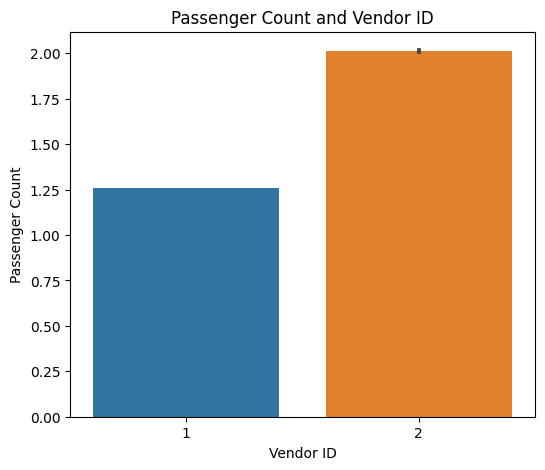

In [58]:
#Passenger count and vendor id barplot
plt.figure(figsize=(6,5))
sns.barplot(y='passenger_count',x='vendor_id',data = data)
plt.ylabel( "Passenger Count")
plt.xlabel("Vendor ID")
plt.title("Passenger Count and Vendor ID")

#Vendor 2 has the most passenger count compare to vendor 1

Text(0.5, 1.0, 'Distance and Trip Duration')

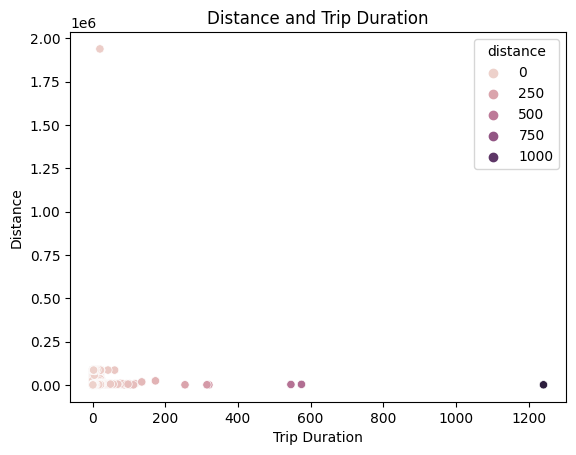

In [59]:
#Trip duration and distance
sns.scatterplot(data=data,x='distance',y='trip_duration',hue='distance')
plt.ylabel( "Distance")
plt.xlabel("Trip Duration")
plt.title("Distance and Trip Duration")

#Between distance and trip duration the is no correlation which can be caused the different factors for example can be weather.

**Correlation between different variables in our Dataset.**

In [60]:
#isolate numerical datatype
num = data.select_dtypes(include=['Int64','float64','Int64'])[:]
num.dtypes


vendor_id              int64
passenger_count      float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration        float64
pickup_hour            int64
dropoff_hour           int64
distance             float64
average_speed        float64
dtype: object

In [61]:
#Calculating Correlation
correlation = num.dropna().corr()
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,distance,average_speed
vendor_id,1.000000,0.286510,0.008237,0.003039,0.002502,0.005537,0.027381,0.009686,0.009706,0.006419,0.001239
passenger_count,0.286510,1.000000,0.001132,-0.004817,-0.000246,-0.004042,0.013102,0.010153,0.009588,0.009035,-0.002794
pickup_longitude,0.008237,0.001132,1.000000,0.050688,0.785326,0.119945,0.035132,0.010583,0.010894,0.247705,0.093112
pickup_latitude,0.003039,-0.004817,0.050688,1.000000,0.121249,0.480265,-0.037912,0.011068,0.017839,-0.123670,0.120990
dropoff_longitude,0.002502,-0.000246,0.785326,0.121249,1.000000,0.150316,0.020315,-0.021674,-0.022917,0.129106,0.043412
dropoff_latitude,0.005537,-0.004042,0.119945,0.480265,0.150316,1.000000,-0.028042,0.014107,0.017935,-0.153559,-0.055695
trip_duration,0.027381,0.013102,0.035132,-0.037912,0.020315,-0.028042,1.000000,0.002993,0.002932,0.125297,-0.027447
pickup_hour,0.009686,0.010153,0.010583,0.011068,-0.021674,0.014107,0.002993,1.000000,0.934491,-0.016198,-0.063949
dropoff_hour,0.009706,0.009588,0.010894,0.017839,-0.022917,0.017935,0.002932,0.934491,1.000000,-0.021044,-0.072268
distance,0.006419,0.009035,0.247705,-0.123670,0.129106,-0.153559,0.125297,-0.016198,-0.021044,1.000000,0.576234


In [62]:
# Unstack all the Numerical columns and then do a quick sort followed by creating a date frame having our sorted values and coefficient together to Analyze
c = num.corr().abs()
s = c.unstack()
so = s.sort_values(kind = 'quicksort',ascending = False)
so = pd.DataFrame(so,columns = ['Pearson Coeficient'])

so[so['Pearson Coeficient']<1].head(25)


#Pickup hour and  Drop-off hour have the Highest Correlation

,,Pearson Coeficient
dropoff_hour,pickup_hour,0.934491
pickup_hour,dropoff_hour,0.934491
dropoff_longitude,pickup_longitude,0.785326
pickup_longitude,dropoff_longitude,0.785326
average_speed,distance,0.576234
distance,average_speed,0.576234
dropoff_latitude,pickup_latitude,0.480265
pickup_latitude,dropoff_latitude,0.480265
vendor_id,passenger_count,0.286510
passenger_count,vendor_id,0.286510


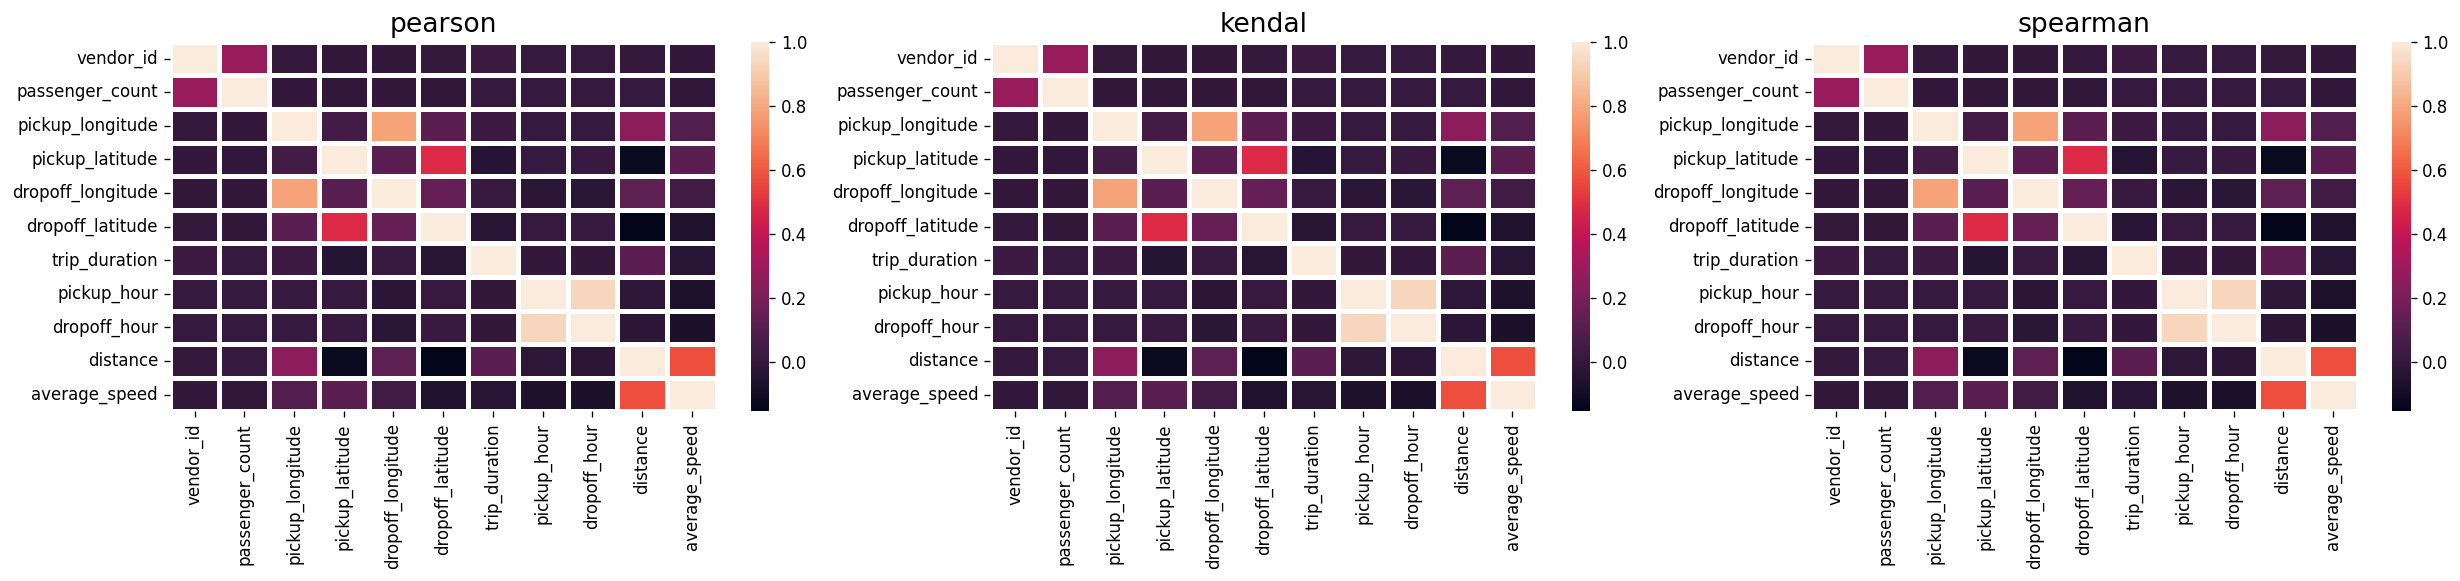

In [63]:
#Plotting the heatmap to see all the Correlations

plt.figure(figsize = (25,4),dpi = 120)
for j,i in enumerate(['pearson','kendal','spearman']):
    plt.subplot(1,3,j+1)
    correlation = num.dropna().corr(method = 'pearson')
    sns.heatmap(correlation,linewidth = 2)
    plt.title(i,fontsize = 16)

#Pearson,Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation
#Major correlation lies between pickup hour and dropoff hour.
#Many variables with insignificant corelation.

**Conclusion**

We can conclude that weekdays have higher trip duration compare to weekends due to high congestion.